# Understanding Stochastic Gradient Descent

In [1]:
import fastbook
from fastbook import *

Let us create a scenario. Assume we are simulating the motion of a roller coaster and we wish to study the speed of the roller-coaster as it goes through different points in the trajectory

<img src="./roller_coaster.jpg" width=75%>

As seen in the image above, we can experience that the roller coaster speeds up when it falls from the topmost point and it's speed continuously decreases as it climbs up to the topmost point and at the topmost point it is zero. Also, we know that the variation is quadratic in nature.

So, let our dependent variable be the velocity at a point of trajectory and the independent variable be the co-ordinate of the point of trajectory. We can then simulate the function as follows by adding some randomness to it.

In [2]:
# Simulate the speeds as a function of position
positions = torch.from_numpy(np.arange(0, 100, 0.5))
speeds = 0.009333 * (positions ** 2) - 0.933 * positions + 80
speeds = speeds + torch.rand_like(speeds) * 5

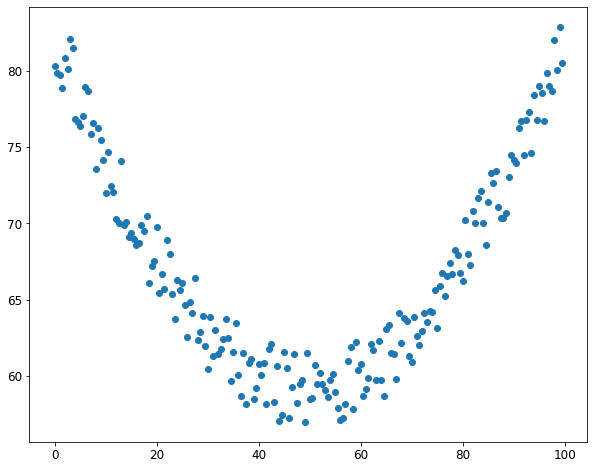

In [3]:
# Plot the speeds to have a look
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.scatter(positions, speeds);

Any ML algorithm has these basic steps involved in it. Now that we have an understanding of our problem, and since we know our function is inherently quadratic with some noise, let's try modelling a quadratic function to fit this function using SGD.

![](ml_basic_algorithm.svg)


## Weight Initialisation

In [4]:
# For us, we'll have three weights i.e. a,b,c which are co-efficients of the quadratic polynomial through which we obtained the above distribution
torch.manual_seed(73)
weights = torch.randn(3)
weights.requires_grad_()

tensor([ 0.0591,  0.4445, -1.2168], requires_grad=True)

## Prediction

In [5]:
def get_preds(weights): return weights[0] * (positions ** 2) + weights[1] * (positions) + weights[2]
# Use the weights initialized above randomly to make a prediction
preds = get_preds(weights)
preds

tensor([-1.2168e+00, -9.7971e-01, -7.1310e-01, -4.1691e-01, -9.1168e-02,  2.6414e-01,  6.4902e-01,  1.0635e+00,  1.5075e+00,  1.9810e+00,  2.4842e+00,  3.0169e+00,  3.5791e+00,  4.1710e+00,
         4.7924e+00,  5.4433e+00,  6.1239e+00,  6.8340e+00,  7.5736e+00,  8.3428e+00,  9.1416e+00,  9.9700e+00,  1.0828e+01,  1.1715e+01,  1.2632e+01,  1.3579e+01,  1.4555e+01,  1.5561e+01,
         1.6596e+01,  1.7661e+01,  1.8756e+01,  1.9880e+01,  2.1033e+01,  2.2216e+01,  2.3429e+01,  2.4671e+01,  2.5943e+01,  2.7244e+01,  2.8575e+01,  2.9936e+01,  3.1326e+01,  3.2746e+01,
         3.4195e+01,  3.5674e+01,  3.7182e+01,  3.8720e+01,  4.0287e+01,  4.1884e+01,  4.3511e+01,  4.5167e+01,  4.6853e+01,  4.8568e+01,  5.0313e+01,  5.2088e+01,  5.3892e+01,  5.5725e+01,
         5.7588e+01,  5.9481e+01,  6.1403e+01,  6.3355e+01,  6.5336e+01,  6.7347e+01,  6.9388e+01,  7.1458e+01,  7.3558e+01,  7.5687e+01,  7.7846e+01,  8.0034e+01,  8.2252e+01,  8.4499e+01,
         8.6776e+01,  8.9083e+01,  9.1419e+01,  9.

## Loss computation

In [6]:
def rmse_loss(preds, targets): return ((preds - targets) ** 2).mean().sqrt()

In [7]:
loss = rmse_loss(preds, speeds)
loss

tensor(239.0592, dtype=torch.float64, grad_fn=<SqrtBackward>)

## Gradient computation

In [8]:
loss.backward()

In [9]:
weights.grad

tensor([4.3820e+03, 5.3204e+01, 6.2616e-01])

## Step -> Weight updation

In [10]:
lr = 1e-5
weights.data -= lr * weights.grad.data
weights.grad = None

## Bundling all the above steps together

In [11]:
def one_epoch(weights, lr = 1e-5):
    # Predict
    predictions = get_preds(weights)
    
    # Compute loss
    loss = rmse_loss(predictions, speeds)
    
    # Find out the gradients
    loss.backward()
    
    # Step
    weights.data -= lr * weights.grad.data
    
    # Zero out the gradients
    weights.grad = None
    
    print(loss.item())
    return predictions

In [12]:
predictions_array = []

In [13]:
for i in range(15):
    preds = one_epoch(weights, lr = 5e-6)
    if i % 5 == 0:
        predictions_array.append(preds)

57.14589269361126
49.78781164782532
49.49989158201165
49.41884864729396
49.39476929809315
49.387506126256596
49.38530199220733
49.38463541433006
49.384430864754925
49.3843709131132
49.38435120455211
49.38434582765026
49.38434488085149
49.384346449723296
49.384343498744435


In [14]:
for i in range(15):
    preds = one_epoch(weights, lr = 1e-6)
    if i % 5 == 0:
        predictions_array.append(preds)

49.38434590194755
43.53223637094356
40.99327426775479
40.17067163396881
39.94378135093623
39.884658865207264
39.86944643276662
39.86549060110579
39.86440501803521
39.86405035204711
39.86388174170108
39.86376018473529
39.863650686377035
39.86354441079437
39.86343884049709


In [15]:
def show_preds(preds, idx, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(positions, speeds)
    ax.scatter(positions, to_np(preds), color='red')
    ax.set_title(f"End of epoch: {5 * idx}")

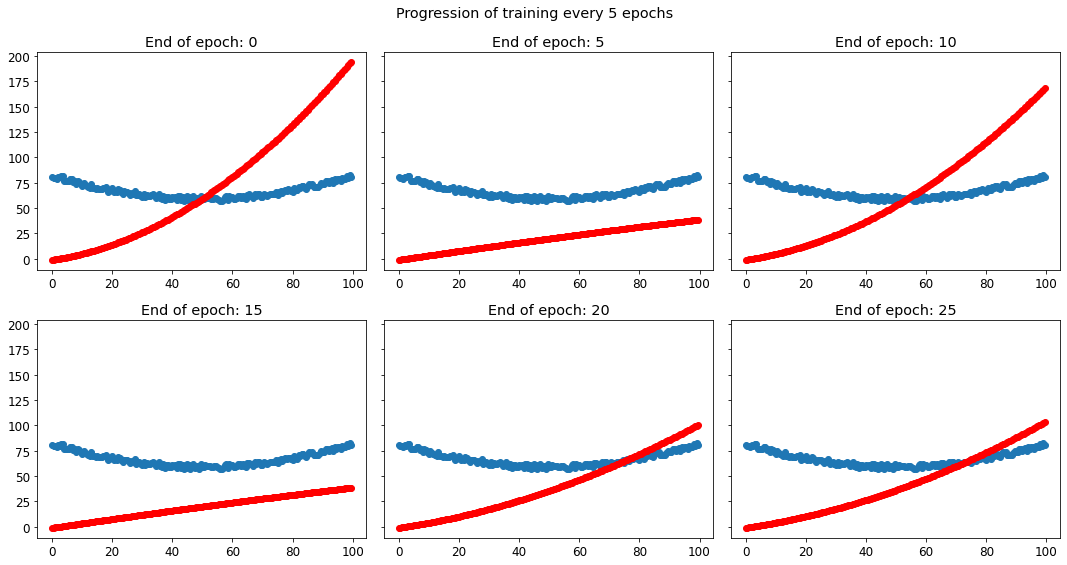

In [16]:
fig, ax = plt.subplots(2, 3, figsize = (15,8), sharey = True)
ax = ax.flatten()

for idx, (predictions, axis) in enumerate(zip(predictions_array, ax)):
    show_preds(predictions, idx, axis)

fig.suptitle("Progression of training every 5 epochs")
fig.tight_layout();

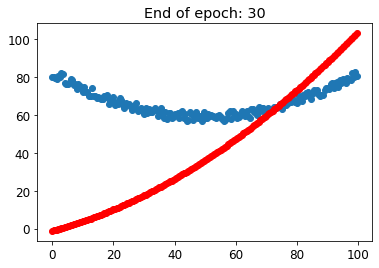

In [17]:
show_preds(predictions_array[-1], 6)

## Batching the whole process

In [18]:
def initialize_weights():
    # Randomly initialize weights to be 3 length tensor
    weights = torch.randn(3)
    weights.requires_grad_()
    return weights

def get_preds_batch(batch, weights):
    # Predict based on the general form of quadratic eqn. i.e. ax^2 + bx + c
    return weights[0] * (batch ** 2) + weights[1] * (batch) + weights[2]

def rmse_loss(predictions, targets):
    # Diff the targets from preds, square them all, sum them all and take a square root of them all
    return ((predictions - targets) ** 2).mean().sqrt()
    
def one_epoch(weights, lr = 1e-5, bs = 64):
    # Break the entire training data into batches
    position_speed_mapping = [(x, y) for x, y in zip(positions, speeds)]
    dls = DataLoader(position_speed_mapping, batch_size = bs, shuffle = False)
    batch_num = 1
    
    # Accumulate all the losses in a container
    losses = []
    
    # Iterate over all the batches
    for position_batch, speed_batch in dls:
        # Predict
        predictions = get_preds_batch(position_batch, weights)
        
        # Compute loss
        loss = rmse_loss(predictions, speed_batch)

        # Compute the gradients
        loss.backward()

        # Take a step in the opposite direction as the gradient
        weights.data -= lr * weights.grad.data

        # Zero out the gradients
        weights.grad = None
        
        # Print the loss at the end of each batch
        print(f"Batch {batch_num:<3}| {round(loss.item(), 5):<10}")
        losses.append(round(loss.item(), 5))
        
        # Increment the batch number
        batch_num += 1
    
    print(f"Epoch loss: {round(np.mean(losses), 5)}")

In [19]:
# Randomly initialize the weights
wts = initialize_weights()

# Run for one epoch and check the loss
for epoch in range(30):
    
    if epoch > 15: lr = 1e-6
    else: lr = 1e-5
    
    print(f"\nEpoch: {epoch + 1}")
    one_epoch(wts, lr = lr, bs = 32)


Epoch: 1
Batch 1  | 105.64514 
Batch 2  | 768.945   
Batch 3  | 2120.42522
Batch 4  | 4104.74592
Batch 5  | 6622.46299
Batch 6  | 9491.3106 
Batch 7  | 10958.11779
Epoch loss: 4881.66467

Epoch: 2
Batch 1  | 80.80498  
Batch 2  | 593.54524 
Batch 3  | 1659.35305
Batch 4  | 3214.7916 
Batch 5  | 5160.07509
Batch 6  | 7312.88012
Batch 7  | 8276.01088
Epoch loss: 3756.78014

Epoch: 3
Batch 1  | 61.72687  
Batch 2  | 418.45622 
Batch 3  | 1198.80131
Batch 4  | 2325.81919
Batch 5  | 3699.29709
Batch 6  | 5136.84623
Batch 7  | 5596.85367
Epoch loss: 2633.97151

Epoch: 4
Batch 1  | 54.77515  
Batch 2  | 244.09769 
Batch 3  | 739.24764 
Batch 4  | 1438.71172
Batch 5  | 2241.57238
Batch 6  | 2965.35817
Batch 7  | 2923.29111
Epoch loss: 1515.29341

Epoch: 5
Batch 1  | 63.9642   
Batch 2  | 73.20047  
Batch 3  | 281.47015 
Batch 4  | 554.71021 
Batch 5  | 788.90904 
Batch 6  | 801.41184 
Batch 7  | 259.01986 
Epoch loss: 403.24082

Epoch: 6
Batch 1  | 84.0599   
Batch 2  | 109.7481  
Batch 3  | 